## One-Way ANOVA Test for Social Media Use and Sleeping Patterns

## Contextualization

Over the past decade, the world has experienced an explosion in the use of social media platforms, especially on mobile devices. Mobiles emit mostly blue light, and these wavelengths are particularly good at keeping us productive and focused. However, according to Newsom, Rob (2020), social media and sleep don’t mix well. The excessive use of social media can reduce sleep quality and increase the risk of a multitude of sleep issues.

## Objectives
The main objective of this study is to analyse if the intensity of social media usage influences the number of hours of sleep using the One-Way Analysis of Variance (One-Way ANOVA) statistical method in Python.

## Limitations
It is important to mention that this is not a scientific experiment carried out by social media or sleep specialists, therefore one cannot assume that one variable causes the other. As wisely stated by Walton, Alice G. (2019), it could be the other way around: individuals who were already poor sleepers are on social media more as a result - or it could be another variable entirely that causes both the social media use and the sleep issues.


----

## Importing the Dataset and Libraries

In [2]:
# importing libraries that will be used in this project
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from distfit import distfit
from bioinfokit.analys import stat 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import bartlett
import warnings

%matplotlib inline 
warnings.filterwarnings("ignore")

In [3]:
# seaborn charts decoration
sns.set(rc={'figure.figsize':(10,5)}, font_scale=1.2)
sns.set_style({'axes.facecolor':'white', 'grid.color': 'white'})

## Data Visualization

In [4]:
# importing dataset
df = pd.read_csv("Series24.csv")

In [5]:
# visualizing the first 5 rows of the dataset
df.head()

,Low Use,Moderate Use,High Use,Very High Use
0,8.983252,8.483252,7.676349,6.976349
1,8.420320,7.920320,7.121458,6.421458
2,8.962186,8.462186,7.655583,6.955583
3,7.850318,7.350318,6.559599,5.859599
4,9.372347,8.872347,8.059885,7.359885


This table provides an initial idea of the dataset used in this project.

In [6]:
# display a concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Low Use        20 non-null     float64
 1   Moderate Use   20 non-null     float64
 2   High Use       20 non-null     float64
 3   Very High Use  20 non-null     float64
dtypes: float64(4)
memory usage: 768.0 bytes


This table gives more information related to the variables and their formats.

## Exploratory Data Analysis

In [7]:
# statistical description of the dataset
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Low Use,20.0,8.723411,0.486282,7.850318,8.447785,8.599661,8.967452,9.968084
Moderate Use,20.0,8.223411,0.486282,7.350318,7.947785,8.099661,8.467452,9.468084
High Use,20.0,7.420219,0.479335,6.559599,7.148531,7.298237,7.660774,8.647112
Very High Use,20.0,6.720219,0.479335,5.859599,6.448531,6.598237,6.960774,7.947112


Considering the statistical description of the dataset presented on the table above, it can be observed that the number of hours of sleep decreases as the usage of social media increases. To exemplify, a person who characterises their social media usage as low, sleeps on average 8.723 hours per night, while a person who states to have a very high usage of social media sleeps only 6.720 hours on average. This behaviour can be observed throughout the standard quartiles (25%, 50%, 75%) and minimum and maximum observed values, where people who spend more time on social media tend to sleep fewer hours.

    index       variable     value
0       0        Low Use  8.983252
1       1        Low Use  8.420320
2       2        Low Use  8.962186
3       3        Low Use  7.850318
4       4        Low Use  9.372347
..    ...            ...       ...
75     15  Very High Use  6.072463
76     16  Very High Use  6.280276
77     17  Very High Use  6.664693
78     18  Very High Use  7.947112
79     19  Very High Use  6.457555

[80 rows x 3 columns]


Text(0.5, 1.0, 'Average Hours of Sleep by Social Media Usage')

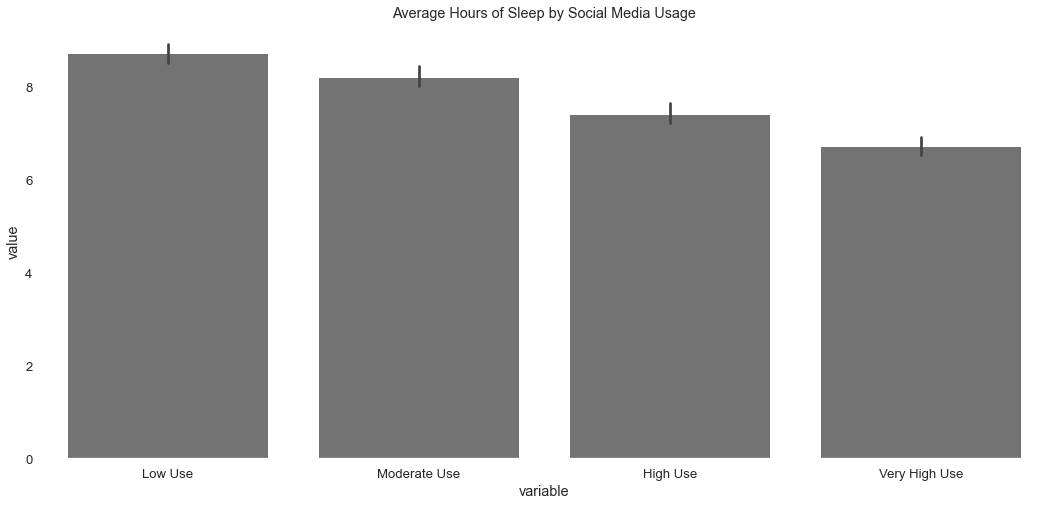

In [8]:
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['Low Use', 'Moderate Use', 'High Use', 
                                                                   'Very High Use'])
# Make the plot
fig, ax = plt.subplots(figsize=(18,8))
sns.barplot(x=df_melt['variable'],y=df_melt['value'],data = df_melt,color='#737373')
plt.title('Average Hours of Sleep by Social Media Usage')

The barplot represented on figure above, provides an easy way to visualise the results observed on the statistical description table where the lowest the use of social media platforms is, the longest the individual tends to sleep. On the other hand, individuals who characterise their social media use as very high, tend to sleep less.

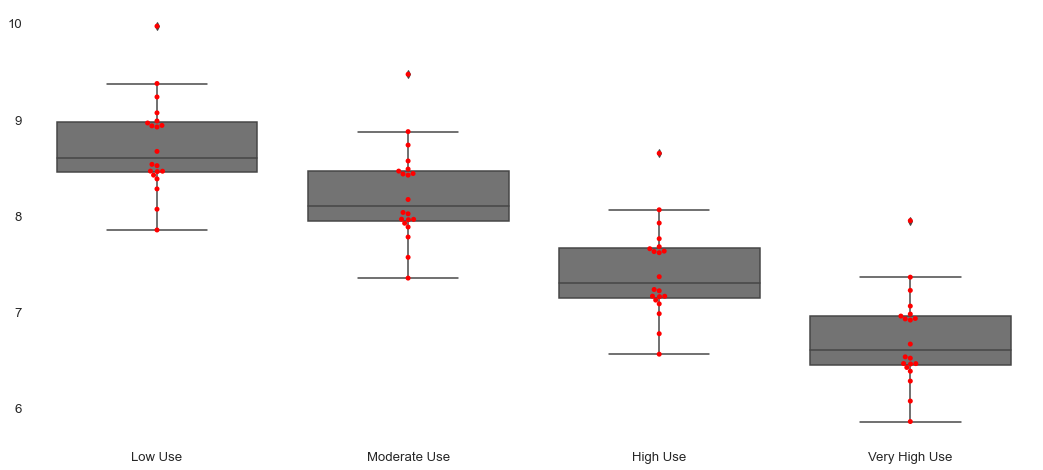

In [10]:
# generate a boxplot to see the data distribution by usage. Using boxplot, we can 
# easily detect the differences between different social media usage
fig, ax = plt.subplots(figsize=(18,8))
ax = sns.boxplot(data=df, color='#737373')
ax = sns.swarmplot(data=df, color='red')
plt.show()

The boxplot above allows to easily detect the differences between social media usages and identify potential outliers. The red points represent each individual. We can observe that, in each group, most of the observations are concentrated in the lower and upper quartiles (Q1 and Q3), and that one outlier is present in each group. Since these outliers are not severe, this study will be carried out taking them into account. 


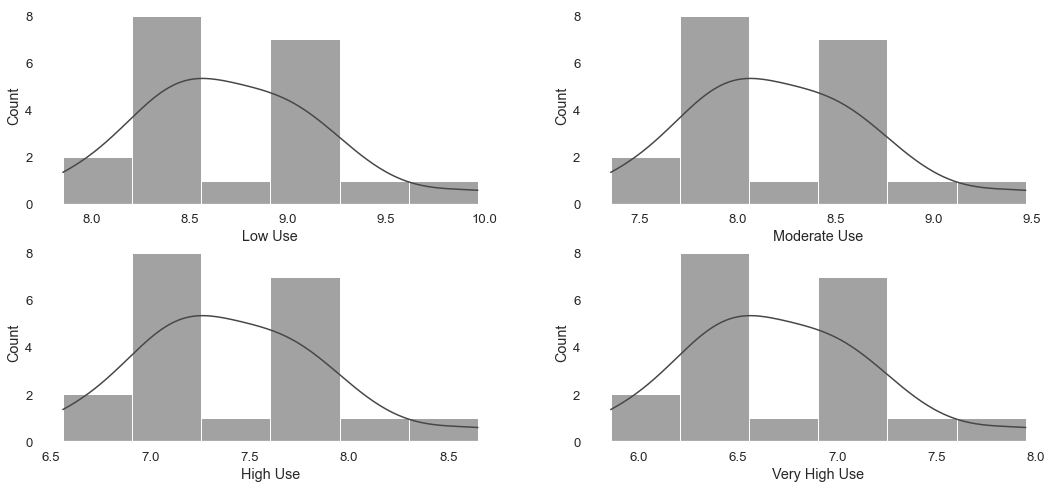

In [9]:
# HISTOGRAM (ALL NUMERIC VARIABLES)

# Identify all numeric variables in the dataset
numerical=df.select_dtypes(include=[np.number]).columns.tolist()

# Draw
fig, ax = plt.subplots(2, 2, figsize=(18,8))
for var, subplot in zip(df[numerical], ax.flatten()):
    g = sns.histplot(data=df,x=var,ax=subplot,kde=True,color='#474747')

The histograms presented on figure 4 show that the distribution of each group is approximately normal, however, a visual analysis is not enough to determine the symmetry of the distribution and formal tests must be applied.


## Distribution Fitting Test

The Shapiro-Wilk test was applied to test the normality of the distribution using the library scipy.stats (Scipy Stats) and the results obtained are shown below on table 2.

In [11]:
# Shapiro-Wilk test for variables altogether
shapiro_test = stats.shapiro(df)
print('Result: ', shapiro_test)

Result:  ShapiroResult(statistic=0.9829710721969604, pvalue=0.3662208616733551)


In [12]:
# Shapiro-Wilk test for each variable individually
def shapiro_test(variable):
    shapiro_test = stats.shapiro(df[variable])
    print(variable, ': ', shapiro_test)

shapiro_test('Low Use')
shapiro_test('Moderate Use')
shapiro_test('High Use')
shapiro_test('Very High Use')

Low Use :  ShapiroResult(statistic=0.9566276669502258, pvalue=0.4788699448108673)
Moderate Use :  ShapiroResult(statistic=0.9566276669502258, pvalue=0.47887012362480164)
High Use :  ShapiroResult(statistic=0.9566276669502258, pvalue=0.47887012362480164)
Very High Use :  ShapiroResult(statistic=0.9566276669502258, pvalue=0.47887012362480164)


Result: The Shapiro-Wilk test p-value is greater than α = 0.05, therefore failing to reject H0.<br>
Conclusion: There is enough evidence to conclude that the data is normally distributed at a 5% significance level.

## Tests for Equality of Variances (Homoscedasticity)

The Levene’s test was applied to test the equality of the variances (figure 6) through the bioinfokit library in Python.


In [ ]:
# re-definining some dataset properties before applying the test
df_melt.columns = ['index', 'usage', 'count']

In [13]:
# initializing the test
res = stat()
res.levene(df=df_melt, res_var='count', xfac_var='usage')
res.levene_summary

,Parameter,Value
0,Test statistics (W),0.0020
1,Degrees of freedom (Df),3.0000
2,p value,0.9999


Result: The Levene’s test p-value is greater than α = 0.05, therefore failing to reject H0.<br>
Conclusion: There is strong evidence that the variances are equal across all samples at 5% confidence level.

## Analysis of Variance (ANOVA)

The Analysis of Variance (ANOVA) technique was applied using the bioinfokit library in Python.

In [15]:
# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
res = stat()
res.anova_stat(df=df_melt, res_var='count', anova_model='count ~ C(usage)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(usage),3.0,46.778932,15.592977,66.889431,2.853701e-21
Residual,76.0,17.716794,0.233116,NaN,NaN


Result: The ANOVA p-value is lower than α = 0.05, therefore H0 is rejected.<br>
Conclusion: It can be concluded that there are significant differences among the usage of social media and the average sleep time.

##  Multiple comparison tests

The Tukey-Kramer test was applied (figure 8) using the bioinfokit library in Python (Bedre, Renesh. 2020).

In [16]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit

# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_melt, res_var='count', xfac_var='usage', anova_model='count ~ C(usage)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Low Use,Moderate Use,0.500000,0.098924,0.901076,4.631261,0.008491
1,Low Use,High Use,1.303192,0.902115,1.704268,12.070840,0.001000
2,Low Use,Very High Use,2.003192,1.602115,2.404268,18.554605,0.001000
3,Moderate Use,High Use,0.803192,0.402115,1.204268,7.439579,0.001000
4,Moderate Use,Very High Use,1.503192,1.102115,1.904268,13.923344,0.001000
5,High Use,Very High Use,0.700000,0.298924,1.101076,6.483765,0.001000


Result: The Tukey-Kramer test p-values are lower than α = 0.05 for all pairwise comparisons, therefore H0 is rejected.<br>
Conclusion: It can be concluded that there are statistical significant differences between the average hours of sleep of each group.

## Conclusion

According to some specialists, the intensity of social media usage can affect the quality of sleep of an individual. In order to test this statement, a group of eighty individuals have characterised their social media usage and average hours of sleep. A dataset with the results was provided for analysis.
Considering the Analysis of Variance (One-Way ANOVA) results, it can be concluded that there is evidence that the intensity of social media usage does affect the average hours of sleep of an individual.

